Problem Statement:
- PriceShop wants to develop a data-driven pricing strategy for its top-selling apparel and homeware items.The goal is to maximize revenue while remaining competitive,especially during peak seasons,clearence periods and promotional campaignss.

Objectives:
- Analyze how customer demand changes based on price,time of day/week,and season.
- Benchmark competitors pricing to avoid under or overpricing
- Evaluate the impact of discounts and promotions on both sales volume and revenue.
- Develop two predictive models that recommend optimal prices for key products.


Questions:
1. Which price points generate the highest revenue for specific product categories?
2. How do competitor price change influence PriceShop's sales volume?
3. What is the optimal discount percentage that maximizes sales without eroding profit?
4. Can we forecast future demand and adjust prices dynamically in advance?
5. How does dynamic pricing impact customer loyalty and basket size?

#Importing Packages(Data Understanding)


In [22]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

#Data Loading(Data Understanding)

In [23]:
#load data into dataframe
df=pd.read_csv('retail_store_inventory.csv')
#display first 5 rows of the data
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [24]:
#check info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

The data has no missing values.It consists of 15 features(columns)and 73100 observations(rows).

In [25]:
#check statistics of the data
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [26]:
#rename columns with small letters and underscore between the words
df.columns=df.columns.str.lower().str.replace(' ','_')
df

,date,store_id,product_id,category,region,inventory_level,units_sold,units_ordered,demand_forecast,price,discount,weather_condition,holiday/promotion,competitor_pricing,seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


In [27]:
#convert date column to datetime format
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                73100 non-null  datetime64[ns]
 1   store_id            73100 non-null  object        
 2   product_id          73100 non-null  object        
 3   category            73100 non-null  object        
 4   region              73100 non-null  object        
 5   inventory_level     73100 non-null  int64         
 6   units_sold          73100 non-null  int64         
 7   units_ordered       73100 non-null  int64         
 8   demand_forecast     73100 non-null  float64       
 9   price               73100 non-null  float64       
 10  discount            73100 non-null  int64         
 11  weather_condition   73100 non-null  object        
 12  holiday/promotion   73100 non-null  int64         
 13  competitor_pricing  73100 non-null  float64   

There are no outliers in the feature and the `date` column is converted to datetime format for time-series analysis.The columns were also rename the columns for according to the PEP8 guidelines.

In [28]:
#price that generates highest revenue per category
df.groupby('category')['price'].sum().sort_values(ascending=False)

,price
category,
Furniture,811029.98
Groceries,807567.82
Toys,805839.58
Electronics,803167.59
Clothing,802771.44


In [29]:
#discount with the highest sales
df.groupby('discount')['units_sold'].sum().sort_values(ascending=False)



,units_sold
discount,
20,2010669
15,1998447
5,1992655
0,1989554
10,1984257


In [30]:
#correlation between prices and the other features
df_numeric=df.select_dtypes(include=[np.number])
df_numeric.corr()

,inventory_level,units_sold,units_ordered,demand_forecast,price,discount,holiday/promotion,competitor_pricing
inventory_level,1.000000,0.589995,0.001060,0.588561,0.009140,0.004889,0.003411,0.009365
units_sold,0.589995,1.000000,-0.000930,0.996853,0.001082,0.002576,-0.000374,0.001259
units_ordered,0.001060,-0.000930,1.000000,-0.001102,0.004212,-0.000938,0.005446,0.004596
demand_forecast,0.588561,0.996853,-0.001102,1.000000,0.000675,0.002338,-0.000526,0.000844
price,0.009140,0.001082,0.004212,0.000675,1.000000,0.001509,0.002309,0.993900
discount,0.004889,0.002576,-0.000938,0.002338,0.001509,1.000000,-0.000852,0.001958
holiday/promotion,0.003411,-0.000374,0.005446,-0.000526,0.002309,-0.000852,1.000000,0.001890
competitor_pricing,0.009365,0.001259,0.004596,0.000844,0.993900,0.001958,0.001890,1.000000


#Exploratory Data Analysis(Data Understanding)

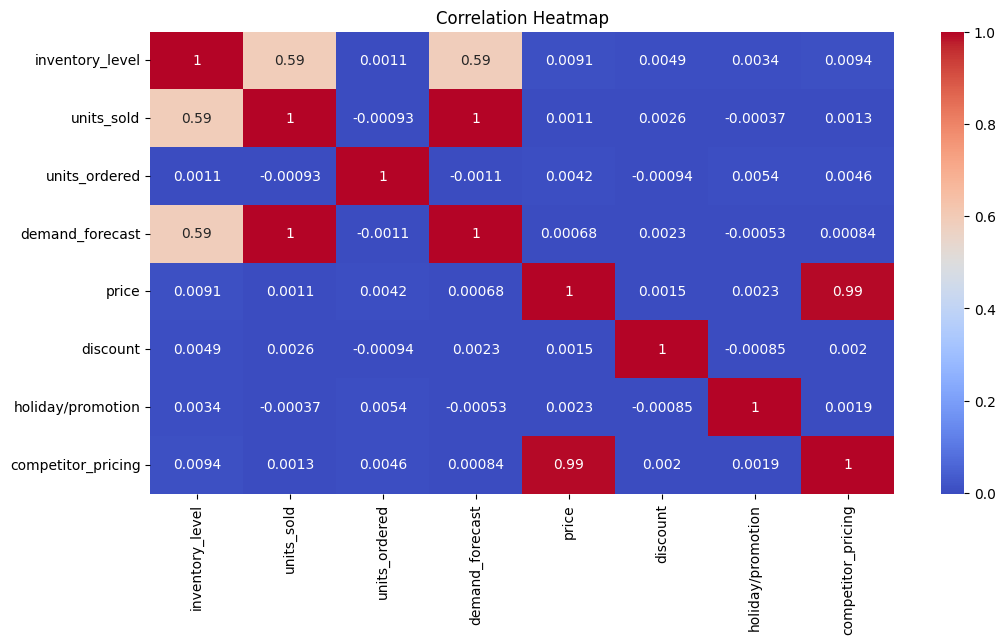

In [31]:
#heatmap between the features in the data
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

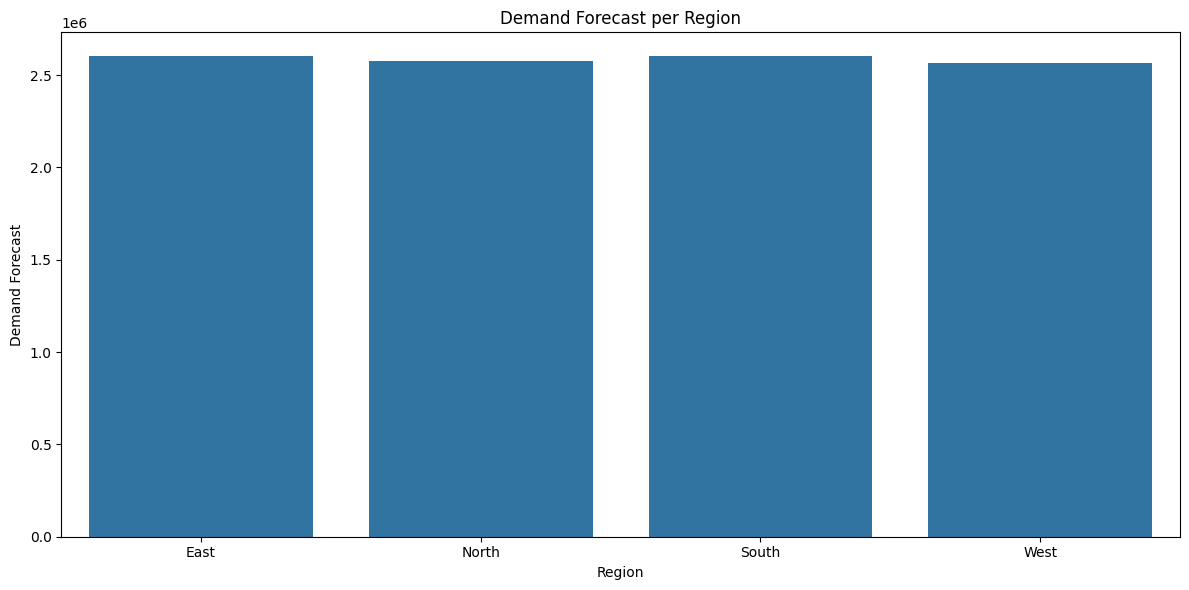

In [32]:
#Group by region and sum of demand forecast
regional_forecast=df.groupby('region')['demand_forecast'].sum()
#Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=regional_forecast.index,y=regional_forecast.values)
plt.title('Demand Forecast per Region')
plt.xlabel('Region')
plt.ylabel('Demand Forecast')
plt.tight_layout()
plt.show()

All of the four regions have approximately the same demand throughout.This shows that all regions are interested in purchasing our products and that we should continue to supply the same amount of products in all the regions.

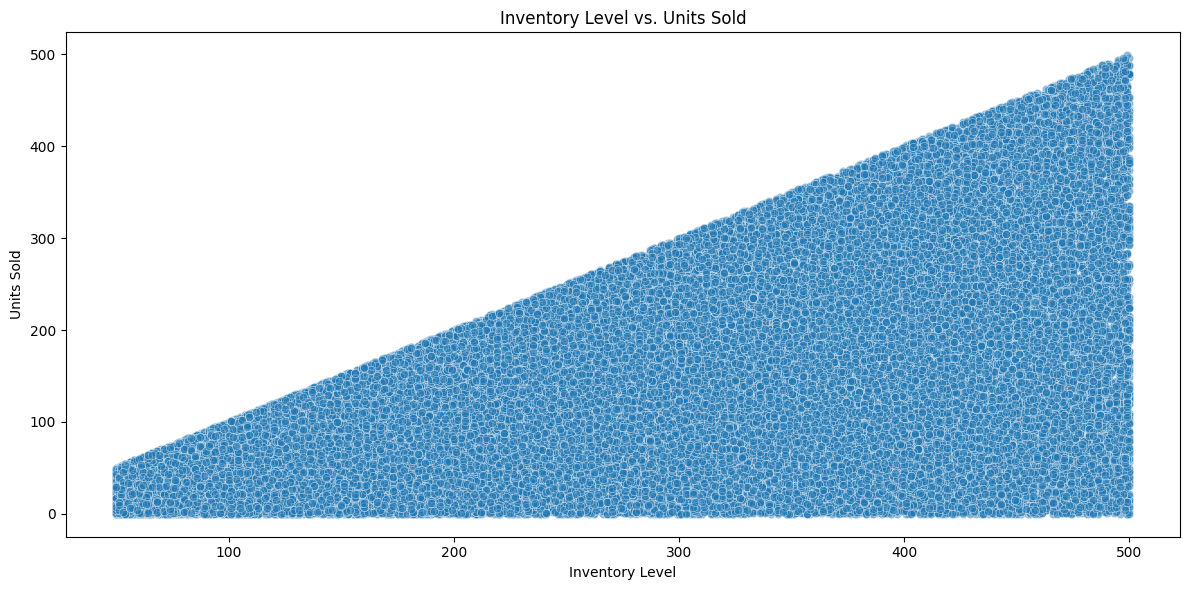

In [33]:
#scatterplot for inventory level vs units sold
plt.figure(figsize=(12,6))
sns.scatterplot(x='inventory_level',y='units_sold',data=df,alpha=0.5)
plt.title('Inventory Level vs. Units Sold')
plt.xlabel('Inventory Level')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

This scatterplot shows that there is a positive relationship between `ìnventory_level` and `units_sold`. This means that the higher the inventory level(stock) the store has,the more units are sold in that store.The store does not need to reduce their stock to keep the products selling as customer have a variety of options to choose from so they keep buying.Although this finding is not specific on which products sell the most,it helps us understand how the units sold is directly affected by the inventory level that the store has.

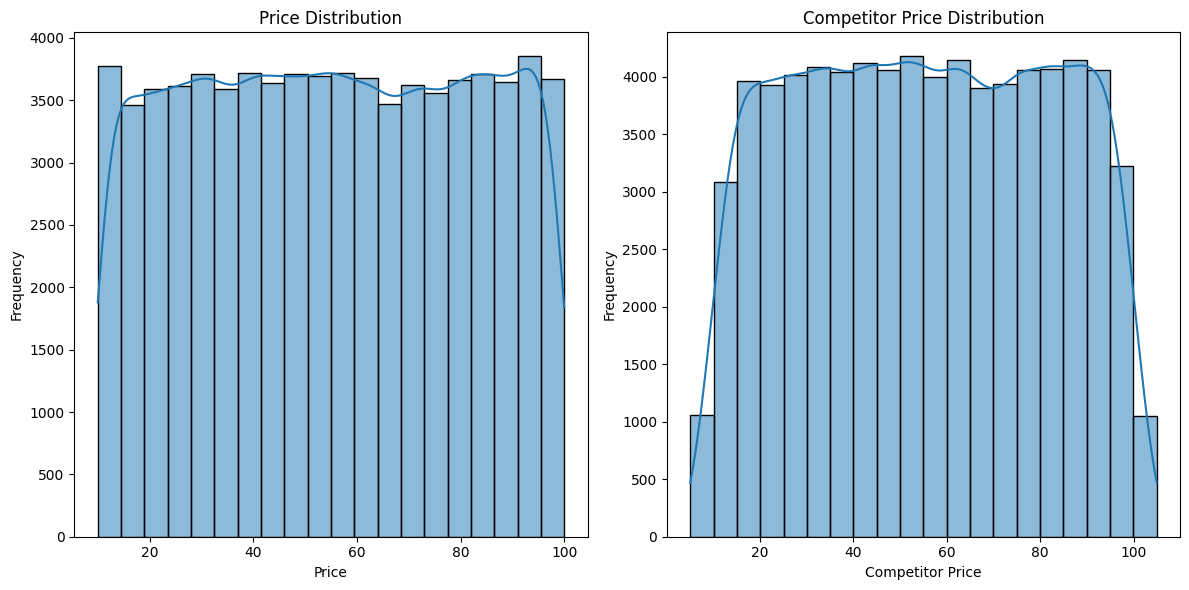

In [34]:
#comparing prices with competitors pricing
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)#subplot for price
sns.histplot(df['price'],kde=True,bins=20)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1,2,2)#subplot for competitor pricing
sns.histplot(df['competitor_pricing'],kde=True,bins=20)
plt.title('Competitor Price Distribution')
plt.xlabel('Competitor Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

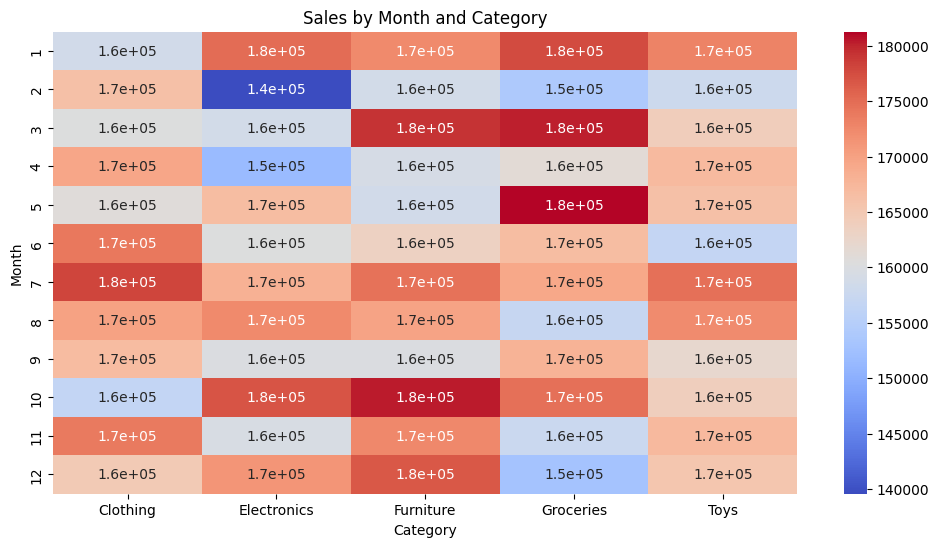

In [35]:
#Understanding sales per month per category
#Extract month from the date
df['month']=df['date'].dt.month

#group by month and category and sum of units sold
sales_by_month_category=df.groupby(['month','category'])['units_sold'].sum().reset_index()

#create pivot table using a heatmap
pivot_table_month_category=sales_by_month_category.pivot(index='month',columns='category',values='units_sold')

#create a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table_month_category,annot=True,cmap='coolwarm')
plt.title('Sales by Month and Category')
plt.xlabel('Category')
plt.ylabel('Month')
plt.show()



#Data Preprocessing(Data Preparation)

In [37]:
#select categorical columns to encode
categorical_cols=['region','category','weather_condition','store_id','product_id','seasonality','date']

#Apply one-hot encoding
df_encoded=pd.get_dummies(df,columns=categorical_cols,drop_first=True)

#Display first few of encoded
df_encoded.head()


,inventory_level,units_sold,units_ordered,demand_forecast,price,discount,holiday/promotion,competitor_pricing,month,region_North,...,date_2023-12-23 00:00:00,date_2023-12-24 00:00:00,date_2023-12-25 00:00:00,date_2023-12-26 00:00:00,date_2023-12-27 00:00:00,date_2023-12-28 00:00:00,date_2023-12-29 00:00:00,date_2023-12-30 00:00:00,date_2023-12-31 00:00:00,date_2024-01-01 00:00:00
0,231,127,55,135.47,33.50,20,0,29.69,1,True,...,False,False,False,False,False,False,False,False,False,False
1,204,150,66,144.04,63.01,20,0,66.16,1,False,...,False,False,False,False,False,False,False,False,False,False
2,102,65,51,74.02,27.99,10,1,31.32,1,False,...,False,False,False,False,False,False,False,False,False,False
3,469,61,164,62.18,32.72,10,1,34.74,1,True,...,False,False,False,False,False,False,False,False,False,False
4,166,14,135,9.26,73.64,0,0,68.95,1,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
#Standardize the columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Fit and transform the data
df_scaled_array=scaler.fit_transform(df_encoded)
#Create new DataFrame with scaled data and original column names
df_scaled=pd.DataFrame(df_scaled_array,columns=df_encoded.columns)
df_scaled.head()

,inventory_level,units_sold,units_ordered,demand_forecast,price,discount,holiday/promotion,competitor_pricing,month,region_North,...,date_2023-12-23 00:00:00,date_2023-12-24 00:00:00,date_2023-12-25 00:00:00,date_2023-12-26 00:00:00,date_2023-12-27 00:00:00,date_2023-12-28 00:00:00,date_2023-12-29 00:00:00,date_2023-12-30 00:00:00,date_2023-12-31 00:00:00,date_2024-01-01 00:00:00
0,-0.334516,-0.086899,-1.052172,-0.055144,-0.831423,1.410350,-0.994625,-0.971931,-1.598842,1.735026,...,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012
1,-0.542290,0.124268,-0.841754,0.023297,0.302627,1.410350,-0.994625,0.420520,-1.598842,-0.576360,...,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012
2,-1.327216,-0.656131,-1.128687,-0.617599,-1.043169,-0.001342,1.005404,-0.909697,-1.598842,-0.576360,...,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012
3,1.496977,-0.692855,1.032872,-0.725971,-0.861398,-0.001342,1.005404,-0.779119,-1.598842,1.735026,...,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012
4,-0.834714,-1.124370,0.478135,-1.210350,0.711131,-1.413034,-0.994625,0.527044,-1.598842,-0.576360,...,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012,-0.037012


In [39]:
#split the data into dependent and independent variable
X=df_scaled.drop('price',axis=1)#Independent variables
y=df_scaled['price']#Dependent variable

#split the data intp training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


#Model Evaluation and Training(Modeling)

In [41]:
#Train a linear regression model using the split data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

#Initialize Linear Regression model
model=LinearRegression()

#Train model using training data
model.fit(X_train,y_train)

#Make predictions on test data
y_pred=model.predict(X_test)

#Evaluate model using metrics
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

#print the results
print(f'Mean Squared Error:{mse}')
print(f'R-squared:{r2}')


Mean Squared Error:0.012407866168447555
R-squared:0.9876857542404454


In [43]:
#Create a DataFrame to compare actual and predicted prices
comparison_df=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})

#Print the first few rows
comparison_df.head(10)

,Actual Price,Predicted Price
66127,-0.563571,-0.489185
43485,-1.402100,-1.476781
34304,-1.337538,-1.393623
34317,1.672250,1.548844
38631,-1.732976,-1.604498
42111,-1.685708,-1.831225
63601,-0.945559,-0.779989
30662,-0.188500,-0.036873
21439,0.255359,0.157695
12107,-1.441298,-1.255978
